# Day 7 - Desafio - Recomendação

#### Nome: Felipe Camargo Natale - RID: 3413

## Contexto:

Durante a pandemia os números de vendas da Razzle Dazzle (e-commerce de
variedades) dispararam, bem como o da concorrência. Uma das maneiras de se
destacar nesse mercado cada vez mais competitivo é oferecer o produto certo
para a pessoa certa.

Então, você foi contratado para **desenvolver pelo menos um modelo de recomendação**,
que será disponibilizado no novo site da empresa. Além do modelo, é necessário
informar **qual o melhor momento para usá-lo**, em propagandas, quando o cliente
estiver fazendo uma pesquisa ou quando o cliente estiver vendo um produto. É
fundamental que isso seja pensado no desenvolvimento do modelo.

## Objetivo: 

**Desenvolver um modelo de classificação para oferecer um produto com uma alta taxa de conversão.**

## Tópicos de apoio

- **Definição do Modelo** → Com a base de dados disponibilizada, quais modelos de
recomendação podem ser feitos?

- **Exploração dos Dados** → O que os dados nos dizem? Quais são as hipóteses que
podem ser levantadas disso? Será que os dados são suficientes para o modelo que
se propôs a fazer?

- **Estruturação dos Dados** → Quais devem ser os dados de Treino? E os de Teste?
Preciso juntar as informações entre as tabelas?

- **Tratamento** → Como pode ser feita a seleção e filtragem dos dados? Quais
tratamentos devem ser feitos considerando os dados existentes?

- **Criação do modelo** → Desenvolva o modelo!

- **Teste do modelo** → Faça testes para validar se os modelos estão retornando
valores esperados

- **Ajustes no Portfólio** → O que pode ser melhorado para que o portfólio seja bem
explicativo e estruturado?

### Glossário de dados

- **DNC_orders_dataset**
    - order_id – Id do pedido de compra;
    - customer_id – Id do consumidor que realizou a compra;
    - order_status – Status da compra;


- **DNC_order_items_dataset**
    - order_id - Id do pedido de compra;
    - order_item_id – Número de produtos em uma mesma compra;
    - product_id – Id do produto;
    - price - preço;


- **DNC_order_reviews_dataset**
    - review_id – Id do pedido de compra;
    - order_id – Id do consumidor que realizou a compra;
    - review_score – Nota do review;

- **DNC_products_dataset**
    - product_id – Id do produto;
    - product_category_name – Categoria do produto;
    - product_name_length – Tamanho do nome do produto;
    - product_description_length – comprimento do produto;
    - products_weight_g – peso do produto em g;
    - products_lenght_cm – comprimento do produto em cm;
    - products_height_cm – Altura do produto em cm;
    - product_widht_cm – largura do produto em cm;

### Import de libs

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Import de dados

In [2]:
order_df = pd.read_csv("DNC_orders_dataset.csv",index_col=0)
order_items_df = pd.read_csv("DNC_order_items_dataset.csv",index_col=0)
order_reviews_df = pd.read_csv("DNC_order_reviews_dataset.csv",index_col=0)
products_df = pd.read_csv("DNC_products_dataset.csv",index_col=0)

### Order DataFrame - Checando duplicatas e valores nulos

In [3]:
order_df.head()

,order_id,customer_id,order_status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered


In [4]:
order_df.drop_duplicates()
order_df.drop_duplicates(subset=['order_id'])

,order_id,customer_id,order_status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered
...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered


In [5]:
order_df.describe(include="all")

,order_id,customer_id,order_status
count,99441,99441,99441
unique,99441,99441,8
top,be8b50c8a24a137dbed81d6c202e8d64,9a235914eec4e7732fbf6fd29addabff,delivered
freq,1,1,96478


In [6]:
order_df.isnull().sum()

order_id        0
customer_id     0
order_status    0
dtype: int64

In [7]:
order_df['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

**Ordem de entrega:** Created -> processing -> approved -> invoiced -> shipped -> delivered (canceled/unavailable)

### Order - Items DataFrame - Checando duplicatas e valores nulos

In [8]:
order_items_df.head()

,order_id,order_item_id,product_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90


In [9]:
order_items_df.drop_duplicates()

,order_id,order_item_id,product_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90
...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,299.99
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,350.00
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,99.90
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,55.99


In [10]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,price
count,112650,112650.000000,112650,112650.000000
unique,98666,NaN,32951,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,NaN
freq,21,NaN,527,NaN
mean,NaN,1.197834,NaN,120.653739
std,NaN,0.705124,NaN,183.633928
min,NaN,1.000000,NaN,0.850000
25%,NaN,1.000000,NaN,39.900000
50%,NaN,1.000000,NaN,74.990000
75%,NaN,1.000000,NaN,134.900000


In [11]:
order_items_df.isnull().sum()

order_id         0
order_item_id    0
product_id       0
price            0
dtype: int64

### Reviews DataFrame  - Checando duplicatas e valores nulos

In [12]:
order_reviews_df.head()

,review_id,order_id,review_score
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5


In [13]:
order_reviews_df.drop_duplicates()
order_reviews_df.drop_duplicates(subset=['review_id'], inplace=True)

In [14]:
order_reviews_df.describe(include="all")

,review_id,order_id,review_score
count,98410,98410,98410.000000
unique,98410,98167,NaN
top,43b41b493832c37cc063db03469b6986,559d606ac642899e44550f194fec7e08,NaN
freq,1,2,NaN
mean,NaN,NaN,4.088802
std,NaN,NaN,1.345758
min,NaN,NaN,1.000000
25%,NaN,NaN,4.000000
50%,NaN,NaN,5.000000
75%,NaN,NaN,5.000000


In [15]:
order_reviews_df.isnull().sum()

review_id       0
order_id        0
review_score    0
dtype: int64

### Products DataFrame  - Checando duplicatas e valores nulos

In [16]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,625.0,20.0,17.0,13.0


In [17]:
products_df.drop_duplicates()
products_df.drop_duplicates(subset=['product_id'])

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,700.0,31.0,13.0,20.0


In [18]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN
top,acdb0f19ecde303b46ede05c270ad40d,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,1900.000000,38.000000,21.000000,30.000000


In [19]:
products_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

### Relação entre dados

![alt text](estrutura_dados.png "Title")

**Relações:**

- Orders - Order_Items : 1 to Many
- Product - Order_Items : 1 to Many
- Orders - Order_Reviews : 1 to 1

## Criando dataframe consolidado

In [20]:
order_df.head(1)

,order_id,customer_id,order_status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered


In [21]:
order_items_df.head(1)

,order_id,order_item_id,product_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.9


In [22]:
order_item_df = order_df.merge(order_items_df, left_on='order_id', right_on='order_id', how='inner')

In [23]:
order_item_df

,order_id,customer_id,order_status,order_item_id,product_id,price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,1,87285b34884572647811a353c7ac498a,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,1,595fac2a385ac33a80bd5114aec74eb8,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,1,aa4383b373c6aca5d8797843e5594415,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,1,65266b2da20d04dbe00c5c2d3bb7859e,19.90
...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,174.90
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,1,b80910977a37536adeddd63663f916ad,205.99
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,1,d1c427060a0f73f6b889a5c7c61f2ac4,179.99
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2,d1c427060a0f73f6b889a5c7c61f2ac4,179.99


In [24]:
product_cat = products_df[['product_id','product_category_name']]

In [25]:
order_prod_cat_df = order_item_df.merge(product_cat, left_on='product_id', right_on='product_id', how='inner')

In [26]:
order_prod_cat_df

,order_id,customer_id,order_status,order_item_id,product_id,price,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,1,87285b34884572647811a353c7ac498a,29.99,utilidades_domesticas
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,1,87285b34884572647811a353c7ac498a,29.99,utilidades_domesticas
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,1,87285b34884572647811a353c7ac498a,29.99,utilidades_domesticas
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,1,87285b34884572647811a353c7ac498a,29.99,utilidades_domesticas
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,1,595fac2a385ac33a80bd5114aec74eb8,118.70,perfumaria
...,...,...,...,...,...,...,...
112645,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,1,0df37da38a30a713453b03053d60d3f7,356.00,esporte_lazer
112646,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2,0df37da38a30a713453b03053d60d3f7,356.00,esporte_lazer
112647,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,1,3d2c44374ee42b3003a470f3e937a2ea,55.90,instrumentos_musicais
112648,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,1,ac35486adb7b02598c182c2ff2e05254,72.00,beleza_saude


In [27]:
order_prod_cat_rev_df = order_prod_cat_df.merge(order_reviews_df, left_on='order_id', right_on='order_id', how='left')

In [28]:
recom_df = order_prod_cat_rev_df[['customer_id', 'order_status', 'product_id', 'product_category_name', 'review_score']]

In [29]:
recom_delivered_df = recom_df[recom_df['order_status'] == 'delivered']

In [30]:
recom_delivered_df.drop_duplicates(inplace=True)

<ipython-input-30-45b3da342ebd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recom_delivered_df.drop_duplicates(inplace=True)


### Tabela consolidada

In [31]:
#recom_delivered_df[recom_delivered_df['product_id']=='99a4788cb24856965c36a24e339b6058']
recom_delivered_df

,customer_id,order_status,product_id,product_category_name,review_score
0,9ef432eb6251297304e76186b10a928d,delivered,87285b34884572647811a353c7ac498a,utilidades_domesticas,4.0
1,a20e8105f23924cd00833fd87daa0831,delivered,87285b34884572647811a353c7ac498a,utilidades_domesticas,4.0
2,26c7ac168e1433912a51b924fbd34d34,delivered,87285b34884572647811a353c7ac498a,utilidades_domesticas,5.0
3,53904ddbea91e1e92b2b3f1d09a7af86,delivered,87285b34884572647811a353c7ac498a,utilidades_domesticas,3.0
4,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,595fac2a385ac33a80bd5114aec74eb8,perfumaria,4.0
...,...,...,...,...,...
112946,ddfdf5e9b2659e1fbd073404c9b762e0,delivered,cbaf5898b92064cd5e399c7cff291d0a,beleza_saude,5.0
112947,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,0df37da38a30a713453b03053d60d3f7,esporte_lazer,4.0
112949,a2f7428f0cafbc8e59f20e1444b67315,delivered,3d2c44374ee42b3003a470f3e937a2ea,instrumentos_musicais,1.0
112950,39bd1228ee8140590ac3aca26f2dfe00,delivered,ac35486adb7b02598c182c2ff2e05254,beleza_saude,5.0


In [32]:
recom_delivered_df['product_id'].nunique()

32216

### Tabela consolidada da nota dos reviews

In [33]:
notas = pd.DataFrame(recom_delivered_df.groupby('product_id')['review_score'].mean())
notas['numero de avaliações'] = pd.DataFrame(recom_delivered_df.groupby('product_id')['review_score'].count())
notas['avaliação média'] = pd.DataFrame(recom_delivered_df.groupby('product_id')['review_score'].mean().round(2))
notas.sort_values(by='numero de avaliações', ascending=False).head(10)

,review_score,numero de avaliações,avaliação média
product_id,,,
99a4788cb24856965c36a24e339b6058,3.933185,449,3.93
aca2eb7d00ea1a7b8ebd4e68314663af,4.130024,423,4.13
422879e10f46682990de24d770e7f83d,4.134286,350,4.13
d1c427060a0f73f6b889a5c7c61f2ac4,4.321543,311,4.32
389d119b48cf3043d311335e499d9c6b,4.192810,306,4.19
53b36df67ebb7c41585e8d54d6772e08,4.245033,302,4.25
368c6c730842d78016ad823897a372db,4.117241,290,4.12
53759a2ecddad2bb87a079a1f1519f73,3.989474,285,3.99
154e7e31ebfa092203795c972e5804a6,4.389105,257,4.39


c:\users\natale\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


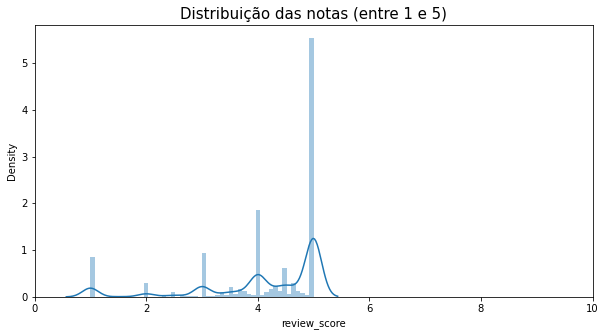

In [34]:
fig = plt.figure(figsize=(10,5))
sns.distplot(notas['review_score'])
plt.xlim(0,10)
plt.title('Distribuição das notas (entre 1 e 5)', fontsize=15);

In [35]:
categoria = pd.DataFrame(data=recom_delivered_df[['product_id','product_category_name']])
categoria.drop_duplicates(inplace=True)
categoria.set_index('product_id', inplace=True)
categoria

,product_category_name
product_id,
87285b34884572647811a353c7ac498a,utilidades_domesticas
595fac2a385ac33a80bd5114aec74eb8,perfumaria
aa4383b373c6aca5d8797843e5594415,automotivo
d0b61bfb1de832b15ba9d266ca96e5b0,pet_shop
65266b2da20d04dbe00c5c2d3bb7859e,papelaria
...,...
cbaf5898b92064cd5e399c7cff291d0a,beleza_saude
0df37da38a30a713453b03053d60d3f7,esporte_lazer
3d2c44374ee42b3003a470f3e937a2ea,instrumentos_musicais


In [36]:
def verificar_categoria(lista_categoria, string): #Definir a função, as variaveis são a lista de categoria e uma string
    if any(x in string for x in lista_categoria): #Se existir um x nessa string que está dentro da lista de generos
        return True #Vai retornar True
    else: #Se não
        return False #Vai retornar False

### Função de recomendação

In [37]:
def recomendar_produto(nome_produto, n):
#Localizar o Produto escolhido dentro do dataframe categoria que criamos lá em cima, depois pegar os valores contidos nessa série e splitar
    genero_produto = categoria.loc[nome_produto].values[0].split(', ')
#Colocar o nome dos Produtos do mesmo gênero que o escolhido e colocar numa lista
    cols = products_df[products_df['product_category_name'].apply(lambda x: verificar_categoria(genero_produto, str(x)))]['product_id'].tolist()    
#Pegar o nome dos Produtos que foram selecionados e fazer uma pivot_table com o df (que foi unido lá em cima) e a nota que cada usuário deu pra esse Produto
    matriz_de_prod = recom_delivered_df[recom_delivered_df['product_id'].isin(cols)].pivot_table(index='customer_id', columns='product_id', values='review_score')    
#Verificar a nota de cada usuário para aquele Produto selecionado
    prod_nota = matriz_de_prod[nome_produto]      
#Fazer a correlação entre os nomes dos Produtos e suas notas
    prod_parecido = matriz_de_prod.corrwith(prod_nota) 
#Criar um dataframe com essa correlação e colocar numa coluna 'correlação'
    prod_correlacionado = pd.DataFrame(prod_parecido, columns=['correlação'])   
#Pegar o dataframe de notas que criamos lá em cima e selecionar as    colunas de numero de avaliações e avaliação média
    prod_correlacionado = prod_correlacionado.join(notas[['numero de avaliações', 'avaliação média']]) 
#Excluir os dados nulos
    prod_correlacionado.dropna(inplace=True)    
#Selecionar apenas os Produtos com número de avaliação maior que 1, colocá-los em ordem descrescente
    prod_recomendados = prod_correlacionado[prod_correlacionado['numero de avaliações'] > 1].sort_values('correlação', ascending=False)    
#Criar nosso dataframe final, que vai ser a tabela dos Produtos recomendados
    prod_recomendados= prod_recomendados.rename_axis('Produtos recomendados')
    print(f'Produto escolhido: {nome_produto}')
    return prod_recomendados.head(n+1)      

### Recomenda produtos semelhantes ao desejado. Essa recomendação seria interessante de ser mostrada no momento que o usuário estivesse interagindo com algum produto. Haja vista, o estímulo (parâmetro) da função é o produto que o usuário interege. Momentos de pesquisa, compra ou propaganda. 

In [38]:
recomendar_produto('422879e10f46682990de24d770e7f83d',5)

Produto escolhido: 422879e10f46682990de24d770e7f83d


,correlação,numero de avaliações,avaliação média
Produtos recomendados,,,
0bcc3eeca39e1064258aa1e932269894,1.0,101,4.15
368c6c730842d78016ad823897a372db,1.0,290,4.12
389d119b48cf3043d311335e499d9c6b,1.0,306,4.19
422879e10f46682990de24d770e7f83d,1.0,350,4.13
53759a2ecddad2bb87a079a1f1519f73,1.0,285,3.99
b0961721fd839e9982420e807758a2a6,1.0,93,4.32
